# Bike Dataset Exploration
## by (Namratha J)

## Preliminary Wrangling

With some reading from the wikipedia , I understand that Ford GoBike(formerly known as Bay Wheels) is a general public bicycle sharing system in California's San Fransisco Bay Area. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. The bicycles are available 24 hours a day, seven days a week for periods ranging from a single ride (up to 30 minutes) to a day pass, in 30-minute increments, or customers can purchase an annual subscription which gives them unlimited rides up to 45-minutes in duration, thus catering to all people at all times.

The dataset given here consists of the data of such people using their services for February 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gather

In [3]:
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

### Assess

DETECT

In [4]:
# check few records
bike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
#inspect the data types of each column
bike_data.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
# size of the dataset
bike_data.shape

(183412, 16)

In [7]:
#check for null data
bike_data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Since the missing data is not huge and at this point its difficult to know what values to fill it with, I will leave it as is.

In [8]:
#check for duplicated data
bike_data.duplicated().sum()

0

In [9]:
# check for the distribution in gender column
bike_data.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [10]:
# check for the distribution in user type column
bike_data.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [11]:
# check for the distribution in bike share column
bike_data.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [21]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


DOCUMENT

### Data Quality Issues: ( Validity)
    1. Incorrect data types for start_time and end_time columns.
    2. Incorrect data types for start_station_d and end_station_id columns.
    3. Incorrect data type bike_id column.
    4. Incorrect data type for user_type column.
    5. Incorrect data type for member_gender column.

### Tidiness Issues:
    I could not see any tidiness issues with this dataset.

In [20]:
# Although member_birth_year cannot be a float type , we cannot convert it to string as we need 
# to do some arithmetic operations on it further

### Clean

In [12]:
# make a copy of the dataframe
bike_data_clean = bike_data.copy()

Lets deal with all the below data quality issues together:
1. Incorrect data types for start_time and end_time columns.
2. Incorrect data types for start_station_d and end_station_id columns.
3. Incorrect data type bike_id column.
4. Incorrect data type for user_type column.
5. Incorrect data type for member_gender column.

### Define: 
1. Convert the start_time and end_time columns to date_time type.
2. Convert the start_station_id and end_station_id columns to string type.
3. Convert the bike_id column to string type.
4. Convert the user_type column to categorical type.
5. Convert the gender column to categorical type.

### Code:

In [17]:
bike_data_clean['start_time'] = pd.to_datetime(bike_data_clean['start_time'])
bike_data_clean['end_time'] = pd.to_datetime(bike_data_clean['end_time'])
bike_data_clean['start_station_id'] = bike_data_clean['start_station_id'].astype('str')
bike_data_clean['end_station_id'] = bike_data_clean['end_station_id'].astype('str')
bike_data_clean['bike_id'] = bike_data_clean['bike_id'].astype('str')
bike_data_clean['user_type'] = bike_data_clean['user_type'].astype('category')
bike_data_clean['member_gender'] = bike_data_clean['member_gender'].astype('category')

### Test

In [24]:
bike_data_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip            object
dtype: object

In [27]:
# Calculate the age of members to do some analysis on that further
from datetime import date

def calculateAge(x): 
    today = date.today() 
    age = today.year - x
    return age 

bike_data_clean['member_age'] = bike_data_clean['member_birth_year'].apply(lambda x : calculateAge(x))

In [28]:
bike_data_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,37.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,47.0


### What is the structure of your dataset?

> The dataset contains 183412 records with 16 features. It contains the following information in brief:
      - start time end time of the bikers along with the duration of the ride in seconds. 
      - The station information(both start and end) including its name, id, latitude, longitude details.
      - The member information: their birth year, bike id they are using, if they are a regular customer or a 
        long term subscriber and their gender info. Also if they have shared bike the entire trip.

### What is/are the main feature(s) of interest in your dataset?

> The features of interest are :
    - The age group of people who are travelling.
    - If there are any specific time or day for their travel.
    - If all the travellers are customers or subscribers.
    - If there is any bias towards the gender.
    - Which member takes the least and the maximum time to ride.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The created age column,start_time, member_gender,user_type,duration_seconds and some more which can be derived from these will be used for the analysis.

## Univariate Exploration

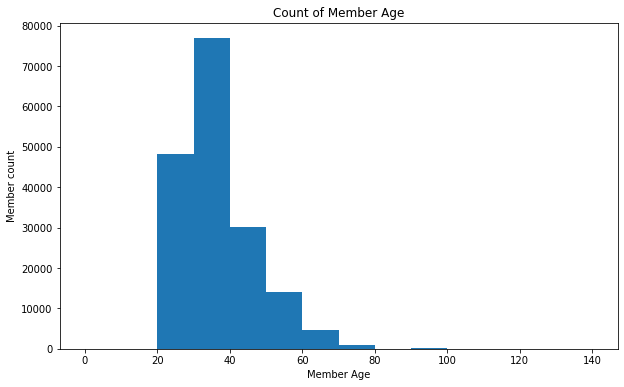

In [33]:
# plot the distribution of age to see the age group
plt.figure(figsize = [10,6])
bins = np.arange(0,150,10)
plt.hist(bike_data_clean['member_age'],bins = bins)
plt.title('Count of Member Age')
plt.xlabel('Member Age')
plt.ylabel('Member count');

In [30]:
print(bike_data_clean['member_age'].min())
print(bike_data_clean['member_age'].max())

20.0
143.0


From the plt it is observed that the majority members are between the age group of 30 and 40. 
Also there are some outliers that is the members with age group of > 100 which is not practically
possible.

In [36]:
bike_data_clean.query('member_age > 100').count()[0]

75

This can be a data/typo error,as there are very few records which are greater than 100. So we can delete the rows where the member age is greater than 100 and then continue our analysis for better results.

In [37]:
b_index = bike_data_clean.query('member_age > 100').index
b_index


Int64Index([  1285,  10827,  16087,  17981,  18885,  19375,  21424,  21506,
             24042,  26133,  27370,  27675,  29716,  32285,  32725,  32809,
             32942,  34747,  38932,  41194,  41246,  41319,  43259,  43880,
             45846,  48804,  58222,  60960,  61611,  62598,  66700,  72711,
             72819,  73755,  75686,  78897,  88152,  92611,  93193,  94326,
             94616,  97721,  97997, 101242, 102148, 107359, 107619, 108314,
            109010, 110468, 110734, 114762, 115637, 119010, 122194, 123240,
            128986, 137804, 138297, 140748, 145510, 147519, 150108, 151936,
            161505, 162051, 163112, 167178, 171086, 171757, 171996, 173711,
            177708, 177885, 182830],
           dtype='int64')

In [39]:
bike_data_clean.iloc[1285]

duration_sec                                         148
start_time                    2019-02-28 19:29:17.627000
end_time                      2019-02-28 19:31:45.967000
start_station_id                                   158.0
start_station_name         Shattuck Ave at Telegraph Ave
start_station_latitude                           37.8333
start_station_longitude                         -122.263
end_station_id                                     173.0
end_station_name                 Shattuck Ave at 55th St
end_station_latitude                             37.8404
end_station_longitude                           -122.264
bike_id                                             5391
user_type                                     Subscriber
member_birth_year                                   1900
member_gender                                       Male
bike_share_for_all_trip                              Yes
member_age                                           121
Name: 1285, dtype: object

In [40]:
bike_data_clean.drop(index = b_index, inplace = True)

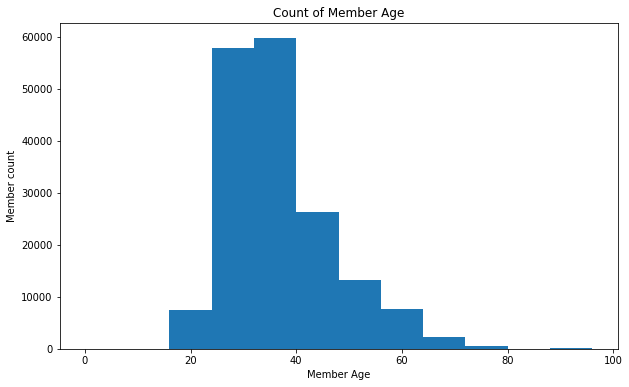

In [45]:
# replot the distribution of age to see the age group
plt.figure(figsize = [10,6])
bins = np.arange(0,100,8)
plt.hist(bike_data_clean['member_age'],bins = bins)
plt.title('Count of Member Age')
plt.xlabel('Member Age')
plt.ylabel('Member count');

This is a better plot comparitively where we see that there are significant number of people between the age group of 25 and 30.

Now let us plot some distributions of categorical variables.

In [48]:
# set the base color for the plot to be resued whereever applicable to preserve high ink ratio.
base_color = sb.color_palette()[0]

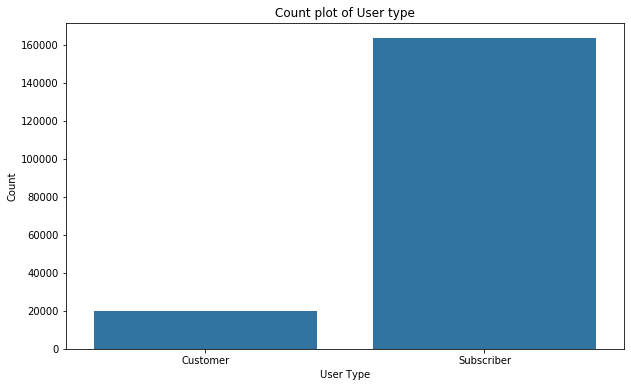

In [112]:
# Plot the distribution of user_type
plt.figure(figsize = [10,6])
sb.countplot(data=bike_data_clean, x='user_type', color = base_color);
plt.title('Count plot of User type')
plt.xlabel('User Type');
plt.ylabel('Count');

We can see that the majority of the bikers were subscribers, which makes sense as we read before 
that they have yearly subscription and they have more time allotment too..

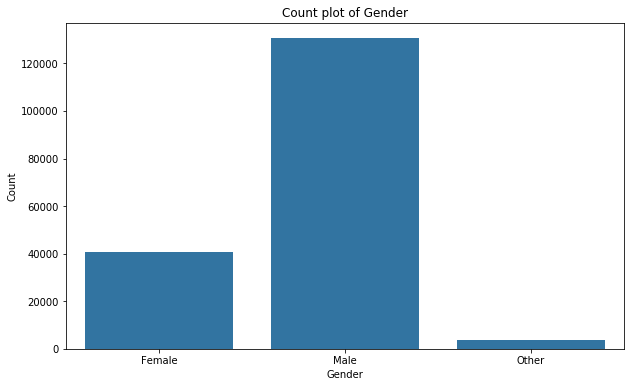

In [113]:
# Plot the distribution to check for gender bias
plt.figure(figsize = [10,6])
sb.countplot(data=bike_data_clean, x='member_gender', color=base_color);
plt.title('Count plot of Gender')
plt.xlabel('Gender');
plt.ylabel('Count');

As always we see that the males ride more.

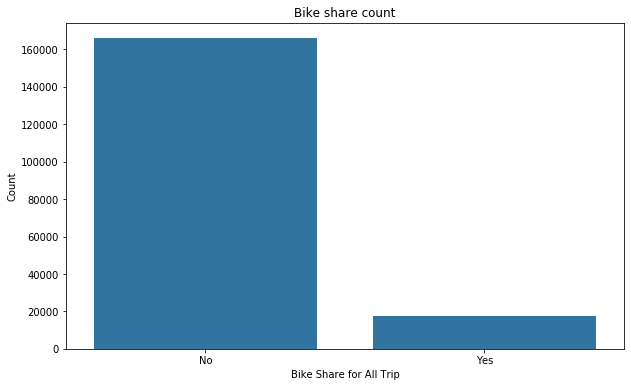

In [114]:
# Plot the distribution to check if the bike share was there all trip
plt.figure(figsize = [10,6])
sb.countplot(data=bike_data_clean, x='bike_share_for_all_trip', color=base_color);
plt.title('Bike share count')
plt.xlabel('Bike Share for All Trip');
plt.ylabel('Count');

Its nice to see that majority of them did not share for most of the trip. That brings me to curiosity 
to find out how long they rode..

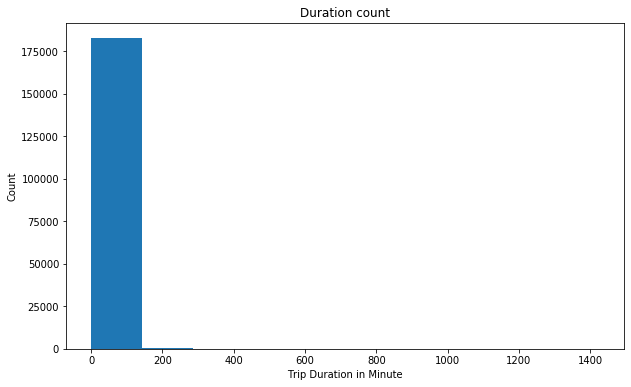

In [108]:
# we have duration seconds, lets convert it to minutes to get a better picture and readability
plt.figure(figsize = [10,6])
bike_data_clean['duration_minute'] = bike_data_clean['duration_sec'] / 60
bins = np.arange(0,1450,5)
plt.hist(data=bike_data_clean, x='duration_minute');
plt.title('Duration count')
plt.xlabel('Trip Duration in Minute');
plt.ylabel('Count');

In [54]:
print(bike_data_clean['duration_minute'].min())
print(bike_data_clean['duration_minute'].max())

1.0166666666666666
1424.0666666666666


Although the maximum value is more, most of them only rode for 200 minutes. Lets see in the later section if its got anything to do with age.

In [84]:
# compute the hour of the day, day of the week and the month from start time column for future analysis
bike_data_clean['hourofday'] = bike_data_clean.start_time.dt.strftime('%H')
bike_data_clean['dayofweek'] = bike_data_clean.start_time.dt.strftime('%A')


In [72]:
# convert the day of week to category to compare the results in future.
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
bike_data_clean['dayofweek'] = bike_data_clean['dayofweek'].astype(weekdaycat)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We saw that 
    - Majority of the riders were male.
    - Most of the bikers did not share during the trip.
    - The members were between 25 and 40 years old and most of them were subscribers.
    - The ride did not last for more minutes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> As we saw the age column had many outliers, so I removed the corresponding rows as they were a few compared to the data size and proceeded with the analysis

## Bivariate Exploration

Text(0.5, 0, 'Member age')

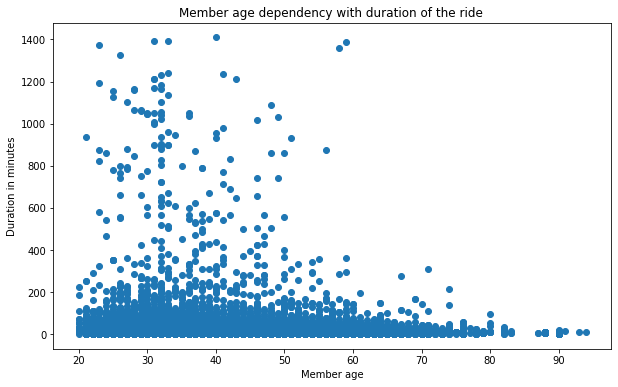

In [107]:
# plot a scatter plot to check the relation between ride duration and the age
plt.figure(figsize = [10,6])
plt.scatter(y = bike_data_clean['duration_minute'], x = bike_data_clean['member_age'])
plt.title('Member age dependency with duration of the ride ')
plt.ylabel('Duration in minutes')
plt.xlabel('Member age')

As we see, naturally though, younger people ride more than the older ones. But mostly its 200 minutes only.

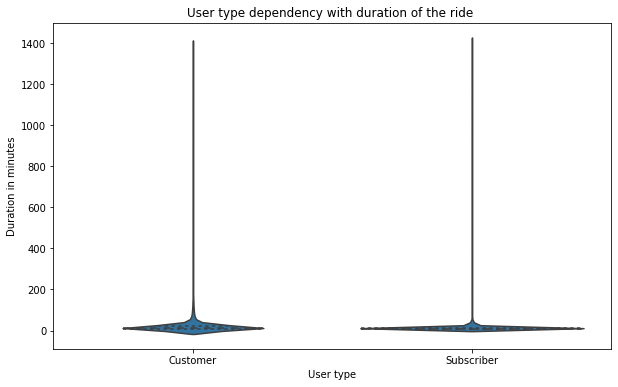

In [106]:
# plot a violin plot to check the relation between ride duration and the user type
plt.figure(figsize = [10,6])
sb.violinplot(data = bike_data_clean, y = 'duration_minute', x = 'user_type',color = base_color,inner = 'quartile')
plt.title('User type dependency with duration of the ride ');
plt.ylabel('Duration in minutes');
plt.xlabel('User type');

As we can see, the subscribers rode for lesser time compared to the customers. Now let us check how many of these users are male.

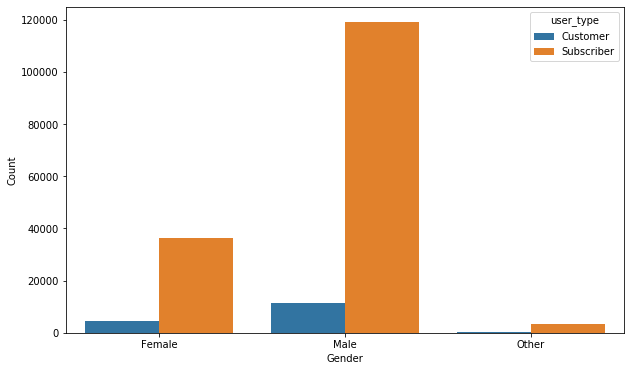

In [105]:
plt.figure(figsize = [10,6])
sb.countplot(data=bike_data_clean, x ='member_gender', hue='user_type');
plt.xlabel('Gender');
plt.ylabel('Count');

Subscribers are more in numbers in all the genders.

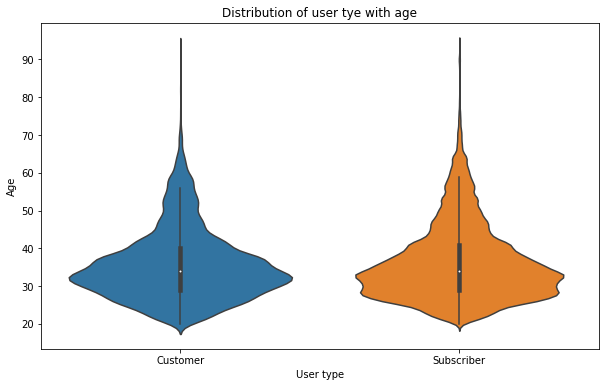

In [104]:
# How are the user types in terms of age?
plt.figure(figsize = [10,6])
sb.violinplot(data=bike_data_clean, y ='member_age', x ='user_type');
plt.title('Distribution of user tye with age')
plt.ylabel('Age');
plt.xlabel('User type');

Subscribers are little older compared to customers.

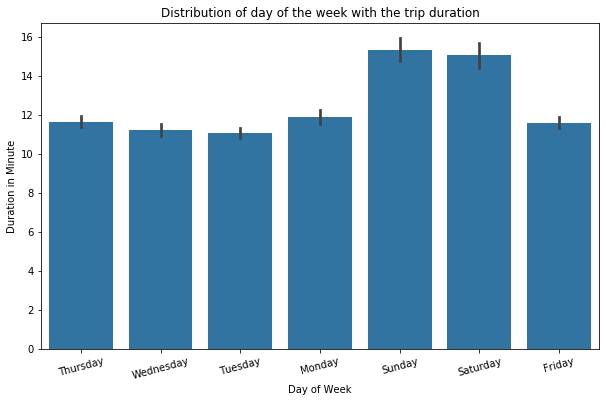

In [103]:
# Distribution of day of the week with the trip duration
plt.figure(figsize = [10,6])
sb.barplot(data=bike_data_clean, x='dayofweek', y='duration_minute', color=base_color);
plt.title('Distribution of day of the week with the trip duration')
plt.xlabel('Day of Week');
plt.xticks(rotation = 15)
plt.ylabel('Duration in Minute');

The duration of the trip seems to be more on weekends than on weekdays. The duration on weekdays seems to be consistent.

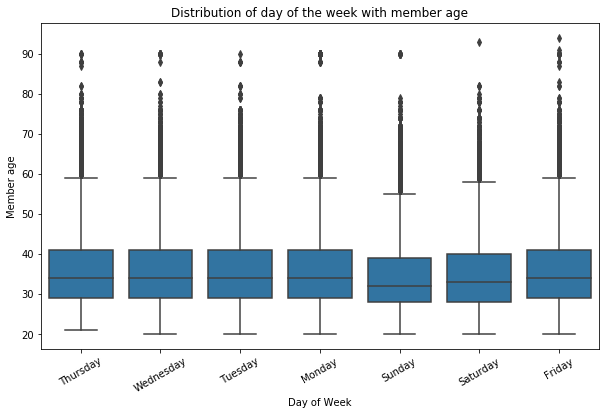

In [102]:
# Let us now figure out the ages of people who ride during this time.
plt.figure(figsize = [10,6])
sb.boxplot(data=bike_data_clean, x='dayofweek', y='member_age', color=base_color);
plt.title('Distribution of day of the week with member age')
plt.xlabel('Day of Week');
plt.xticks(rotation = 30)
plt.ylabel('Member age');

The riders who ride during the weekdays are older compared to those on weekends.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

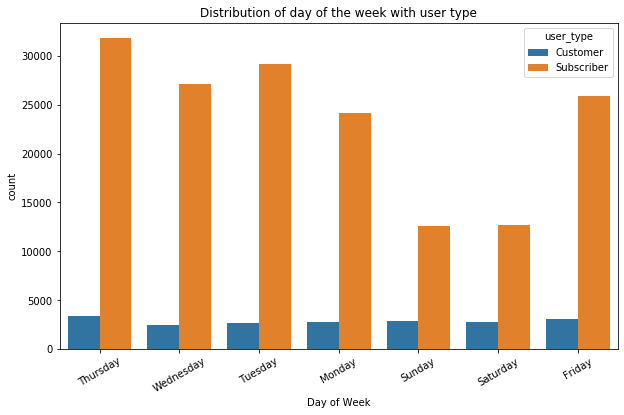

In [101]:
# Of these which user type is mostly seen?
plt.figure(figsize = [10,6])
sb.countplot(data=bike_data_clean, x='dayofweek', hue ='user_type');
plt.title('Distribution of day of the week with user type')
plt.xlabel('Day of Week');
plt.xticks(rotation = 30)

Like we saw in the previous plots, the subscribers are more in number and are mostly seen on the weekdays

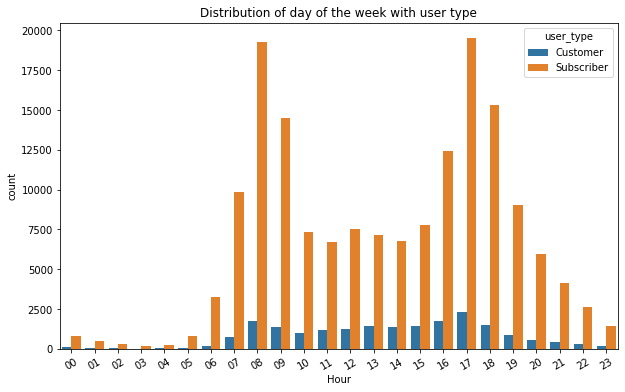

In [100]:
# Now that we know subscribers travel,which part of the day do they travel ?
plt.figure(figsize = [10,6])
sb.countplot(data=bike_data_clean, x='hourofday', hue ='user_type');
plt.title('Distribution of day of the week with user type')
plt.xlabel('Hour');
plt.xticks(rotation = 30);

The subscribers mostly travel during 8am, 9am,5pm and 6pm which is typical timings for working professionals

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Subscribers are more in number compared to the customers and mostly travel on the weekdays at 8am, 9am and 5pm ,6pm which shows that these subscribers are mostly working class and hence ride lesser too.
- Younger people travel less on weekdays compared to that on weekends and are Customers. Subscribers are older and hence stick to their working schedule. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Day of the week and hour of the day which were derived features of the main ones gave much more information in addition to the main features of interest.

## Multivariate Exploration


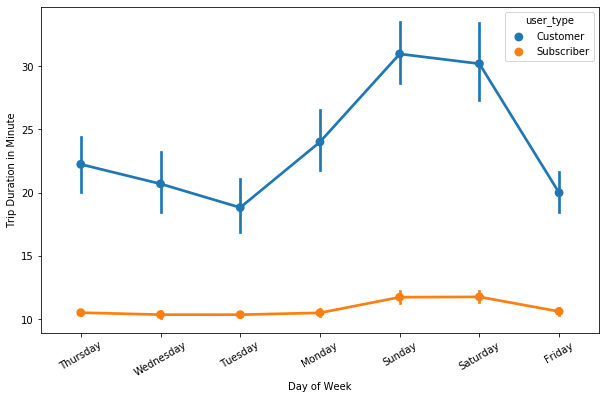

In [115]:
# How do the subscribers travel during the week
plt.figure(figsize = [10,6])
sb.pointplot(data=bike_data_clean , x='dayofweek', y='duration_minute', hue='user_type');
plt.xlabel('Day of Week');
plt.xticks(rotation = 30)
plt.ylabel('Trip Duration in Minute');

As we had deduced before, the subscribers travel less comparitively and they do mostly on weekdays. Customers seems to be casual riders and ride more on weekends.

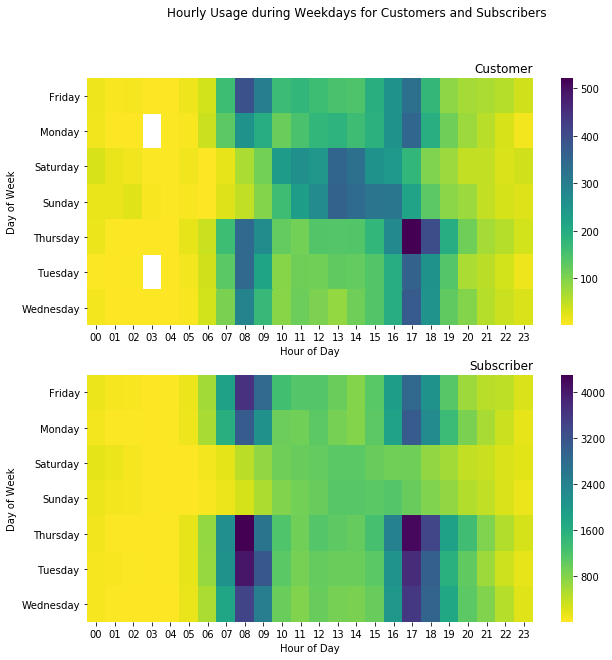

In [99]:
# Hourly time consumed by Customers and Subscribers.
plt.figure(figsize = [10,10])
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = bike_data_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['dayofweek', 'hourofday']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='dayofweek', columns='hourofday', values='count')
sb.heatmap(ct_counts, cmap='viridis_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = bike_data_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['dayofweek', 'hourofday']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='dayofweek', columns='hourofday', values='count')
sb.heatmap(st_counts, cmap='viridis_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The observations from the multivariate exploration strengthened the analysis made during the univariate and bivariate explorations. The analysis made with respect to the subscribers and customers furthered proved to be true.
The subscribers are working class people who travel at 8 am and 5pm and mostly during weekdays.

### Were there any interesting or surprising interactions between features?

The analysis done so far proved right further and there was nothing surprising as such.

The basic idea about what the the dataset is about was taken from the wikipedia page:
https://en.m.wikipedia.org/BayWheels
    
I took some idea for multivariate explorations from the below link:
https://github.com/kzhang789/Communicate-data-findings/blob/master/fordgobike_exploration.ipynb